### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:

# lee el archivo .tsv en un dataframe  
import pandas as pd 


In [2]:
df = pd.read_csv('data/druglibTrain_raw.tsv', sep='\t')

In [3]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (10 como mucho)

In [4]:
# selecciona solo las columnas que cumplan ese criterio 

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [5]:
df= df[['rating', 'effectiveness', 'sideEffects']]

In [6]:
df

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects
...,...,...,...
3102,10,Highly Effective,Mild Side Effects
3103,1,Ineffective,Extremely Severe Side Effects
3104,2,Marginally Effective,Moderate Side Effects
3105,8,Considerably Effective,Mild Side Effects


<function matplotlib.pyplot.show(close=None, block=None)>

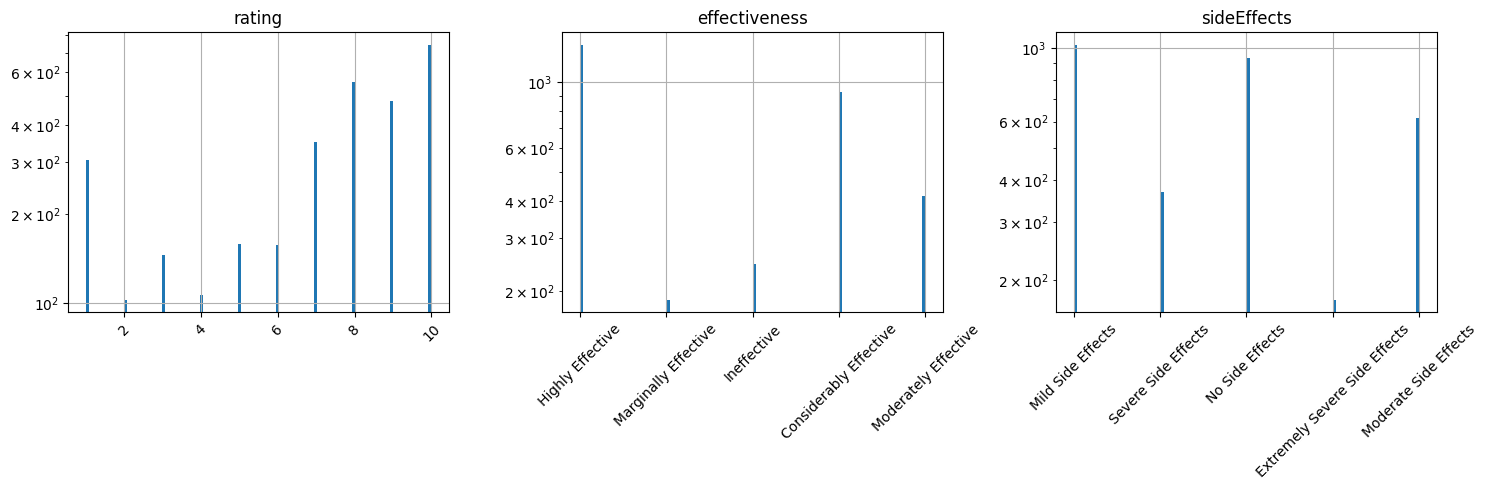

In [7]:
# diagramas de barras para las frecuencias acumuladas de las categorías

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(15,5))

for n, c in enumerate(df.columns):
  ax = figure.add_subplot(1,3,n+1)
  ax.set_title(c)
  ax.set_yscale("log") #the log scale help us to have a better idea of our data when the distribution is not fair
  df[c].hist(ax=ax, bins=100)
  ax.tick_params(axis='x', labelrotation=45)

figure.tight_layout() #this feature separate the graphs correctly
plt.show

#### Transforma las columnas categoricas

Transforma las columnas categóricas no codificadas a numéricas mediante dummies.

In [8]:
# ojo, las columnas categóricas no codificadas ya

df= pd.get_dummies(df,columns=['effectiveness','sideEffects']) 



In [9]:
df

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,4,False,True,False,False,False,False,True,False,False,False
1,1,False,True,False,False,False,False,False,False,False,True
2,10,False,True,False,False,False,False,False,False,True,False
3,3,False,False,False,True,False,False,True,False,False,False
4,2,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3102,10,False,True,False,False,False,False,True,False,False,False
3103,1,False,False,True,False,False,True,False,False,False,False
3104,2,False,False,False,True,False,False,False,True,False,False
3105,8,True,False,False,False,False,False,True,False,False,False


#### Evalúa cuál es la mejor K

Utiliza silhouette_score para evaluar cuál es la mejor K. Evalúa como mucho K = 20

#### Genera el K Means 

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 


In [11]:
kmeans_per_k = [KMeans(n_clusters=k,random_state=42,n_init=10).fit(df) for k in range(1,20)]

In [12]:
silhouette_scores = [silhouette_score(df,model.labels_)for model in kmeans_per_k[1:]]

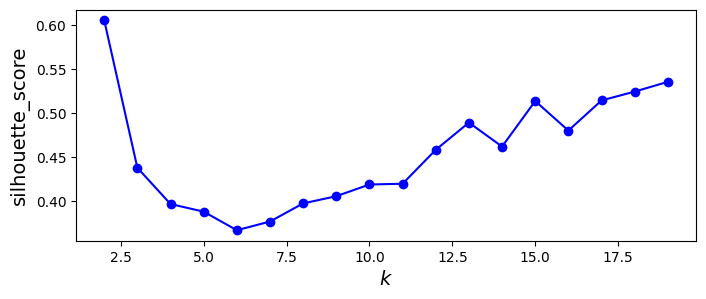

In [15]:
plt.figure(figsize=(8,3))
plt.plot(range(2,20,),silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('silhouette_score',fontsize=14) 
plt.show()

Text(0, 0.5, 'Inertia')

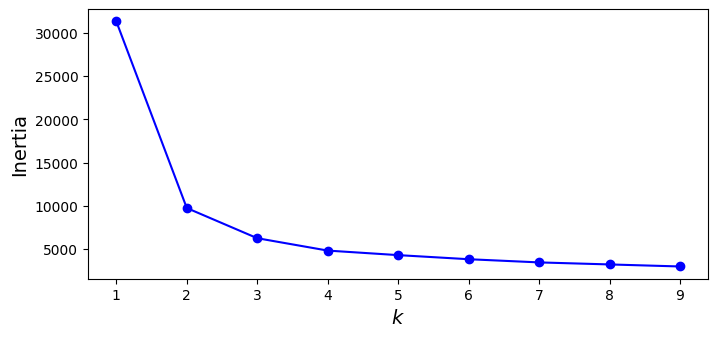

In [16]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(df) for k in range(1,10)] 
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8,3.5))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

In [17]:
kmeans = KMeans(n_clusters=2 ,random_state=42,n_init=10).fit(df)

#### Muestra en un gráfico de quesito la distribución de los distintos clusters

<Axes: ylabel='count'>

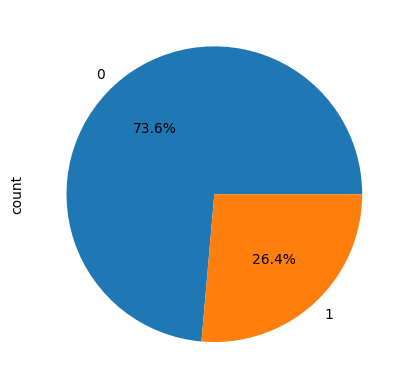

In [18]:


# a partir del kmeans calculado, muestra la proporción de clusters en un diagrama de quesito


df=pd.DataFrame({'Data': kmeans.labels_})
df['Data'].value_counts().plot.pie(autopct='%.1f%%')
